<a href="https://colab.research.google.com/github/saurabhgwari/Correlation-Analysis/blob/main/Movie_Correlation_Project_from_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Upload data

In [127]:
import pandas as pd
import io
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the config of plots we will create

for local file : 

In [128]:
#from google.colab import files
#uploaded = files.upload()

#df = pd.read_csv(io.BytesIO(uploaded['movies.csv']), encoding='latin-1')

For github csv file 

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/saurabhgwari/Correlation-Analysis/main/movies.csv', encoding='latin-1')

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Cleaning & formating data

In [130]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [131]:
# Loop to check if there is any missing data :

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [132]:
# Data Types for our columns 

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [133]:
# 'budget' & 'gross' columns are showing as float but we don't want decimal values so let's change to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [134]:
# 'year' & 'released' are not same for some rows, let's extract year from 'released' column and drop 'year'

df['year_correct'] = df['released'].astype('str').str[:4]
df.drop(columns='year', inplace=True)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [135]:
# incase we want to see all the data

pd.set_option('display.max_rows', None)

In [136]:
# Drop any duplicates 

df.shape

(6820, 15)

In [137]:
# Get entire unique company list 

df['company'].drop_duplicates().sort_values(ascending=False).head()

5288                    micro_scope
3486                       i5 Films
6084                           erbp
3225                 double A Films
2707    Zucker Brothers Productions
Name: company, dtype: object

In [138]:
# Get Top 10 companies by frequency

df['company'].value_counts().sort_values(ascending=False).head(10)

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Columbia Pictures Corporation             166
Touchstone Pictures                       131
Columbia Pictures                         108
Walt Disney Pictures                      102
Metro-Goldwyn-Mayer (MGM)                 101
Name: company, dtype: int64

In [139]:
# Order entire dataset by 'Gross' column

df = df.sort_values(by=['gross'], ascending=False)

# Correlation Analysis

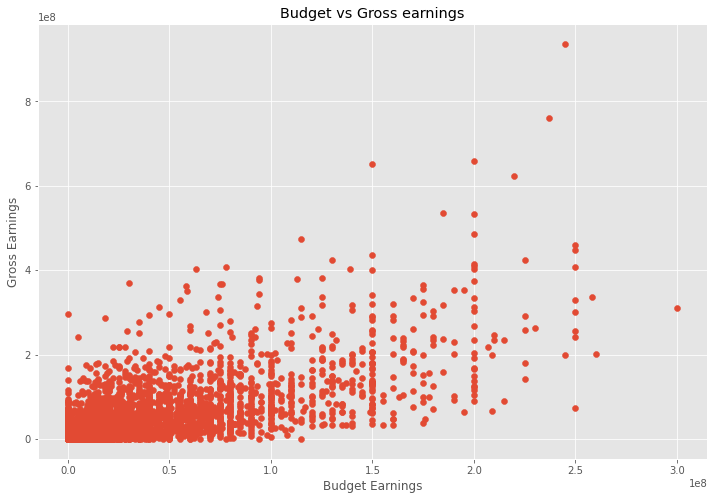

In [140]:
# Scatter plot for Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'] )
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget Earnings')
plt.ylabel('Gross Earnings')
plt.show()

In [141]:
# Quick check the above scatter plot 

df[['name','company','budget','gross']].sort_values(by='gross', ascending=False).head(10)

,name,company,budget,gross
6380,Star Wars: The Force Awakens,Lucasfilm,245000000,936662225
5061,Avatar,Twentieth Century Fox Film Corporation,237000000,760507625
2420,Titanic,Twentieth Century Fox Film Corporation,200000000,658672302
6391,Jurassic World,Universal Pictures,150000000,652270625
5723,The Avengers,Marvel Studios,220000000,623357910
4840,The Dark Knight,Warner Bros.,185000000,534858444
6614,Rogue One,Lucasfilm,200000000,532177324
6687,Finding Dory,Pixar Animation Studios,200000000,486295561
2870,Star Wars: Episode I - The Phantom Menace,Lucasfilm,115000000,474544677
6398,Avengers: Age of Ultron,Marvel Studios,250000000,459005868


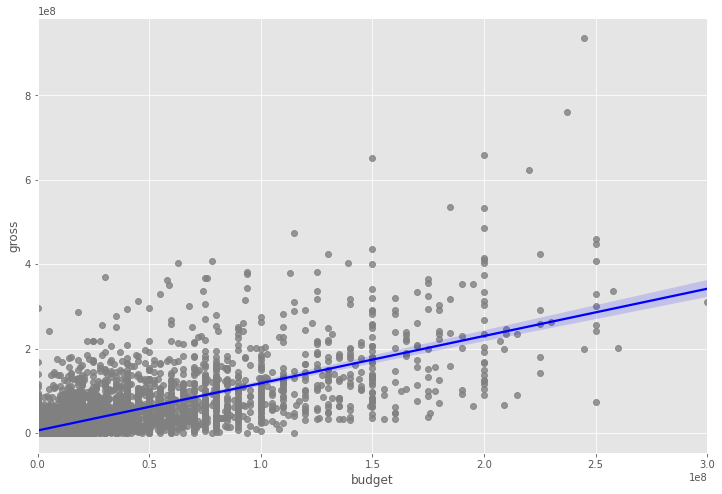

In [142]:
# now let's make a regression plot (budget vs gross) using seaborn

sns.regplot(x='budget', y='gross', data=df, 
            scatter_kws={"color":"grey"}, 
            line_kws={"color":"blue"})

In [143]:
# Let's look at correlation matrix now, but this is for numeric features only

df.corr(method="pearson")       # pearson(default), kendall, spearman

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


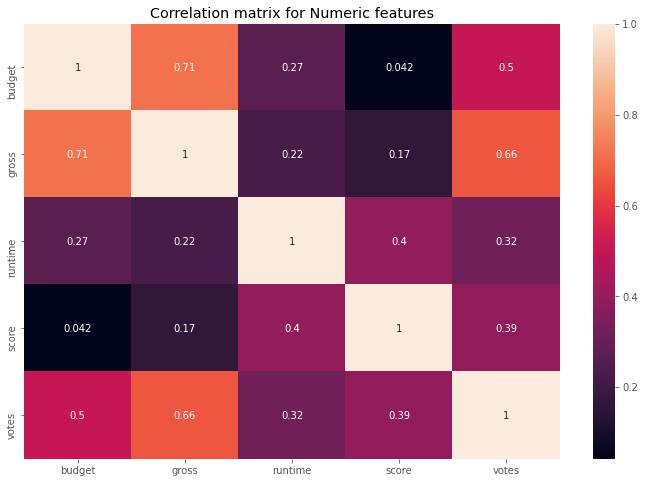

In [144]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric features')
plt.show()

In [145]:
#  now let's also look at text features

df_numerized = df.copy()

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,26


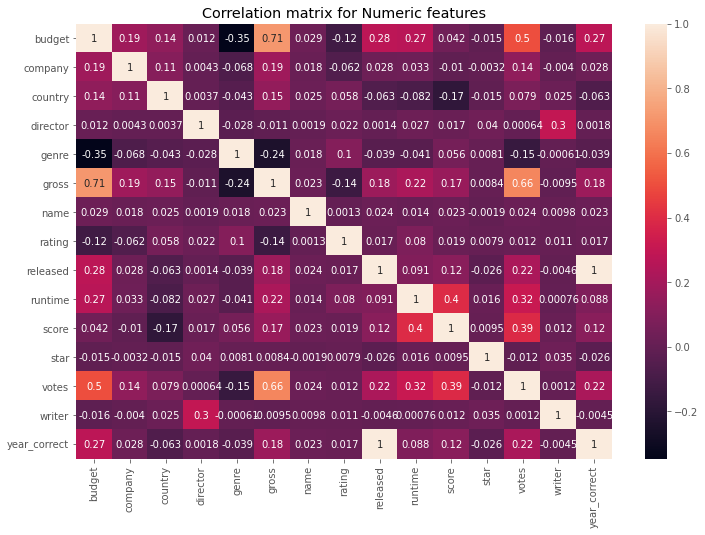

In [146]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric features')
plt.show()

In [147]:
correlation_matrix

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.176879
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.088342


In [148]:
# Unstacking 

corr_pairs = correlation_matrix.unstack()
corr_pairs.head()

budget  budget      1.000000
        company     0.187205
        country     0.137635
        director    0.011602
        genre      -0.346794
dtype: float64

In [149]:
sort_pairs = corr_pairs.sort_values()

In [150]:
sort_pairs.tail()

director      director        1.0
country       country         1.0
company       company         1.0
writer        writer          1.0
year_correct  year_correct    1.0
dtype: float64

In [151]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

votes         budget          0.503924
budget        votes           0.503924
gross         votes           0.662457
votes         gross           0.662457
gross         budget          0.712196
budget        gross           0.712196
released      year_correct    0.999389
year_correct  released        0.999389
budget        budget          1.000000
rating        rating          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
writer        writer          1.000000
year_correct  year_correct    1.000000
dtype: float64

From above list, we can see Gross is correlated to budget and votes.

# Conclusion

In this analysis we wanted to understand on which factor does gross depends for a movie. In our hypothesis, we assumed Company would play and important factor however Correlation matrix showed otherwise.

Gross is correlated to Budget of movie and votes it received. For our analysis we used Pearson correlation factor.